In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [3]:
t = 500.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
α = 1.15; U0 = 0.3;
xthr = 0.9; ythr = 0.4
ΔU0 = 0.4
I0 = -1.51075;

In [5]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.528766, 0.961119, 0.418381]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.3, 0.4, 0.4375, -1.51075]

In [19]:
I0range = range( -1.51075, -1.51090, length = 2000 )

idx_control_parameter = 11
idx_fix = 2; fixed_value = 0.915
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-11, atol = 1e-11);

In [20]:
length(I0range)

2000

In [21]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.51075
parameter = -1.5107500750375187
parameter = -1.5107501500750375
parameter = -1.5107502251125562
parameter = -1.510750300150075
parameter = -1.5107503751875937
parameter = -1.5107504502251126
parameter = -1.5107505252626312
parameter = -1.51075060030015
parameter = -1.510750675337669
parameter = -1.5107507503751876
parameter = -1.5107508254127064
parameter = -1.510750900450225
parameter = -1.510750975487744
parameter = -1.5107510505252626
parameter = -1.5107511255627815
parameter = -1.5107512006003
parameter = -1.510751275637819
parameter = -1.5107513506753376
parameter = -1.5107514257128565
parameter = -1.5107515007503751
parameter = -1.510751575787894
parameter = -1.5107516508254126
parameter = -1.5107517258629315
parameter = -1.5107518009004501
parameter = -1.510751875937969
parameter = -1.5107519509754876
parameter = -1.5107520260130065
parameter = -1.5107521010505252
parameter = -1.510752176088044
parameter = -1.5107522511255629
parameter = -1.5107523261630815


parameter = -1.5107694347173586
parameter = -1.5107695097548774
parameter = -1.510769584792396
parameter = -1.510769659829915
parameter = -1.5107697348674338
parameter = -1.5107698099049525
parameter = -1.5107698849424713
parameter = -1.51076995997999
parameter = -1.5107700350175088
parameter = -1.5107701100550275
parameter = -1.5107701850925463
parameter = -1.510770260130065
parameter = -1.5107703351675839
parameter = -1.5107704102051025
parameter = -1.5107704852426214
parameter = -1.51077056028014
parameter = -1.5107706353176589
parameter = -1.5107707103551775
parameter = -1.5107707853926964
parameter = -1.510770860430215
parameter = -1.5107709354677339
parameter = -1.5107710105052525
parameter = -1.5107710855427714
parameter = -1.51077116058029
parameter = -1.510771235617809
parameter = -1.5107713106553278
parameter = -1.5107713856928464
parameter = -1.5107714607303653
parameter = -1.510771535767884
parameter = -1.5107716108054028
parameter = -1.5107716858429214
parameter = -1.51077

parameter = -1.5107888694347174
parameter = -1.5107889444722362
parameter = -1.5107890195097549
parameter = -1.5107890945472737
parameter = -1.5107891695847924
parameter = -1.5107892446223112
parameter = -1.5107893196598299
parameter = -1.5107893946973487
parameter = -1.5107894697348674
parameter = -1.5107895447723863
parameter = -1.510789619809905
parameter = -1.5107896948474238
parameter = -1.5107897698849424
parameter = -1.5107898449224613
parameter = -1.51078991995998
parameter = -1.5107899949974988
parameter = -1.5107900700350174
parameter = -1.5107901450725363
parameter = -1.510790220110055
parameter = -1.5107902951475738
parameter = -1.5107903701850927
parameter = -1.5107904452226113
parameter = -1.5107905202601302
parameter = -1.5107905952976488
parameter = -1.5107906703351677
parameter = -1.5107907453726863
parameter = -1.5107908204102052
parameter = -1.5107908954477238
parameter = -1.5107909704852427
parameter = -1.5107910455227613
parameter = -1.5107911205602802
parameter = 

parameter = -1.5108082291145573
parameter = -1.5108083041520761
parameter = -1.5108083791895948
parameter = -1.5108084542271136
parameter = -1.5108085292646323
parameter = -1.5108086043021511
parameter = -1.5108086793396698
parameter = -1.5108087543771886
parameter = -1.5108088294147073
parameter = -1.5108089044522262
parameter = -1.5108089794897448
parameter = -1.5108090545272637
parameter = -1.5108091295647823
parameter = -1.5108092046023012
parameter = -1.5108092796398198
parameter = -1.5108093546773387
parameter = -1.5108094297148573
parameter = -1.5108095047523762
parameter = -1.510809579789895
parameter = -1.5108096548274137
parameter = -1.5108097298649326
parameter = -1.5108098049024512
parameter = -1.51080987993997
parameter = -1.5108099549774887
parameter = -1.5108100300150076
parameter = -1.5108101050525262
parameter = -1.510810180090045
parameter = -1.5108102551275637
parameter = -1.5108103301650826
parameter = -1.5108104052026012
parameter = -1.51081048024012
parameter = -1

parameter = -1.5108275887943972
parameter = -1.510827663831916
parameter = -1.5108277388694347
parameter = -1.5108278139069535
parameter = -1.5108278889444722
parameter = -1.510827963981991
parameter = -1.5108280390195097
parameter = -1.5108281140570285
parameter = -1.5108281890945472
parameter = -1.510828264132066
parameter = -1.5108283391695847
parameter = -1.5108284142071036
parameter = -1.5108284892446222
parameter = -1.510828564282141
parameter = -1.51082863931966
parameter = -1.5108287143571786
parameter = -1.5108287893946974
parameter = -1.510828864432216
parameter = -1.510828939469735
parameter = -1.5108290145072536
parameter = -1.5108290895447725
parameter = -1.510829164582291
parameter = -1.51082923961981
parameter = -1.5108293146573286
parameter = -1.5108293896948475
parameter = -1.5108294647323661
parameter = -1.510829539769885
parameter = -1.5108296148074036
parameter = -1.5108296898449225
parameter = -1.5108297648824411
parameter = -1.51082983991996
parameter = -1.5108299

parameter = -1.510846948474237
parameter = -1.510847023511756
parameter = -1.5108470985492746
parameter = -1.5108471735867934
parameter = -1.510847248624312
parameter = -1.510847323661831
parameter = -1.5108473986993496
parameter = -1.5108474737368685
parameter = -1.510847548774387
parameter = -1.510847623811906
parameter = -1.5108476988494246
parameter = -1.5108477738869435
parameter = -1.5108478489244623
parameter = -1.510847923961981
parameter = -1.5108479989994998
parameter = -1.5108480740370185
parameter = -1.5108481490745373
parameter = -1.510848224112056
parameter = -1.5108482991495749
parameter = -1.5108483741870935
parameter = -1.5108484492246124
parameter = -1.510848524262131
parameter = -1.5108485992996499
parameter = -1.5108486743371685
parameter = -1.5108487493746874
parameter = -1.510848824412206
parameter = -1.510848899449725
parameter = -1.5108489744872435
parameter = -1.5108490495247624
parameter = -1.510849124562281
parameter = -1.5108491995998
parameter = -1.51084927

parameter = -1.5108663831915958
parameter = -1.5108664582291145
parameter = -1.5108665332666333
parameter = -1.510866608304152
parameter = -1.5108666833416708
parameter = -1.5108667583791895
parameter = -1.5108668334167084
parameter = -1.5108669084542272
parameter = -1.5108669834917459
parameter = -1.5108670585292647
parameter = -1.5108671335667834
parameter = -1.5108672086043022
parameter = -1.5108672836418209
parameter = -1.5108673586793397
parameter = -1.5108674337168584
parameter = -1.5108675087543773
parameter = -1.510867583791896
parameter = -1.5108676588294148
parameter = -1.5108677338669334
parameter = -1.5108678089044523
parameter = -1.510867883941971
parameter = -1.5108679589794898
parameter = -1.5108680340170084
parameter = -1.5108681090545273
parameter = -1.510868184092046
parameter = -1.5108682591295648
parameter = -1.5108683341670834
parameter = -1.5108684092046023
parameter = -1.5108684842421212
parameter = -1.5108685592796398
parameter = -1.5108686343171587
parameter = 

parameter = -1.5108856678339169
parameter = -1.5108857428714357
parameter = -1.5108858179089544
parameter = -1.5108858929464732
parameter = -1.510885967983992
parameter = -1.5108860430215107
parameter = -1.5108861180590296
parameter = -1.5108861930965483
parameter = -1.5108862681340671
parameter = -1.5108863431715858
parameter = -1.5108864182091046
parameter = -1.5108864932466233
parameter = -1.5108865682841421
parameter = -1.5108866433216608
parameter = -1.5108867183591796
parameter = -1.5108867933966983
parameter = -1.5108868684342172
parameter = -1.5108869434717358
parameter = -1.5108870185092547
parameter = -1.5108870935467733
parameter = -1.5108871685842922
parameter = -1.5108872436218108
parameter = -1.5108873186593297
parameter = -1.5108873936968483
parameter = -1.5108874687343672
parameter = -1.5108875437718858
parameter = -1.5108876188094047
parameter = -1.5108876938469236
parameter = -1.5108877688844422
parameter = -1.510887843921961
parameter = -1.5108879189594797
parameter 

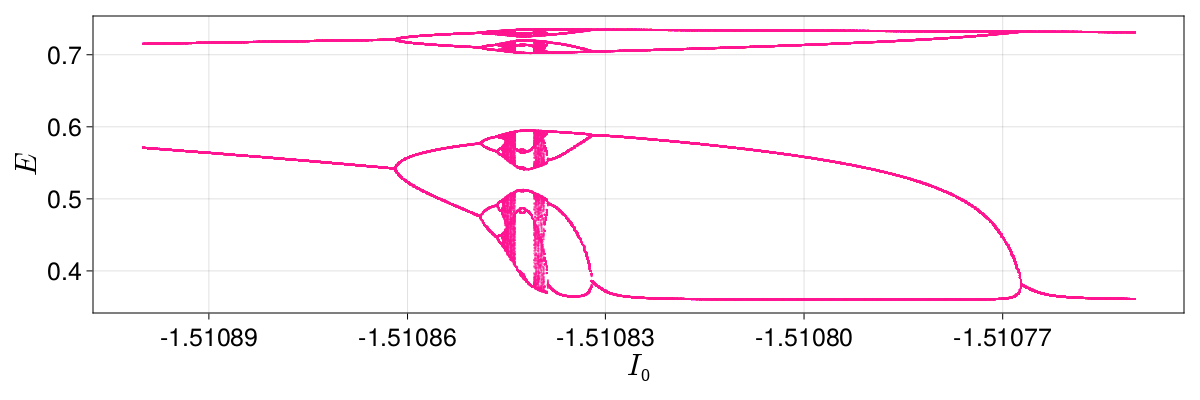

In [29]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 2.0)
end
f

In [25]:
save("E_left_space_2000_dots.jld", "data", output)